In [1]:
# Import the MSCDB api
import mascdb.api
from mascdb.api import MASC_DB

# Import other libraries
import numpy as np
import pandas as pd
import pyarrow

# Autoreload
%load_ext autoreload
%autoreload 2

In [2]:
masc_path = 'Data/MASCDB'
mascdb = MASC_DB(masc_path)

In [3]:
print(mascdb)
len(mascdb)

MASCDB data structure:
-------------------------------------------------------------------------
- mascdb.da:
<xarray.DataArray 'MASC Images' (flake_id: 851697, y: 1024, x: 1024, cam_id: 3)>
dask.array<open_dataset-f88ac00cfc3eb869ff881a341318dec5data, shape=(851697, 1024, 1024, 3), dtype=uint8, chunksize=(256, 1024, 1024, 3), chunktype=numpy.ndarray>
Coordinates:
  * cam_id    (cam_id) int64 0 1 2
  * flake_id  (flake_id) <U32 '2015.02.10_11.55.10_flake_4' ... '2021.03.17_1...
Dimensions without coordinates: y, x
-------------------------------------------------------------------------
- mascdb.cam0, mascdb.cam1, mascdb.cam2:
                                               datetime  \
flake_id                                                  
2015.02.10_11.55.10_flake_4  2015-02-10 11:55:10.530427   
2015.02.10_11.55.15_flake_9  2015-02-10 11:55:15.132434   
2015.02.10_11.55.16_flake_10 2015-02-10 11:55:16.661233   
2015.02.10_11.55.17_flake_11 2015-02-10 11:55:17.410032   
2015.02.10_

851697

<AxesSubplot:xlabel='Dmax'>

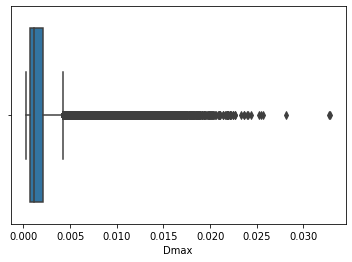

In [5]:
mascdb.cam0.sns.boxplot(x="Dmax")   

<AxesSubplot:xlabel='Dmax'>

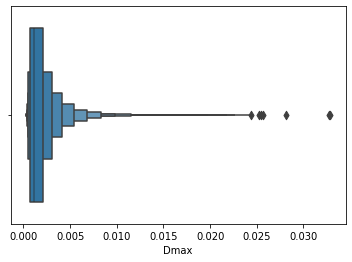

In [6]:
mascdb.cam0.sns.boxenplot(x="Dmax")  

<AxesSubplot:xlabel='Dmax'>

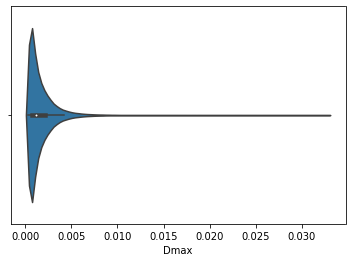

In [7]:
 mascdb.cam0.sns.violinplot(x="Dmax") 

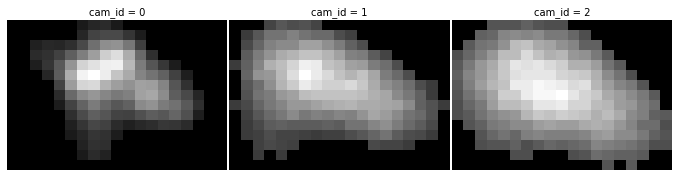

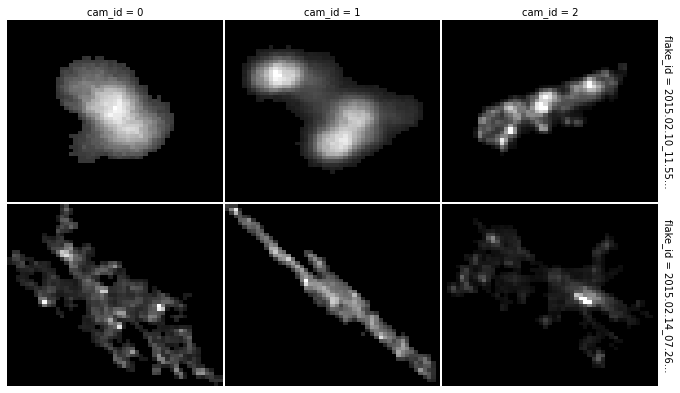

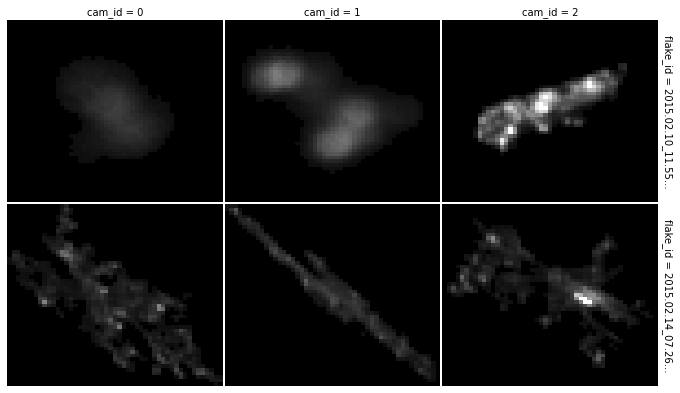

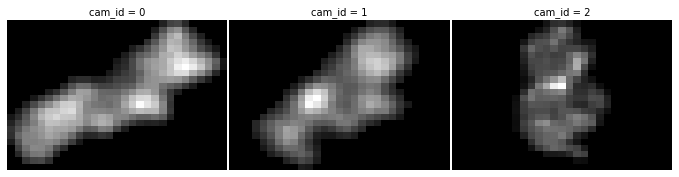

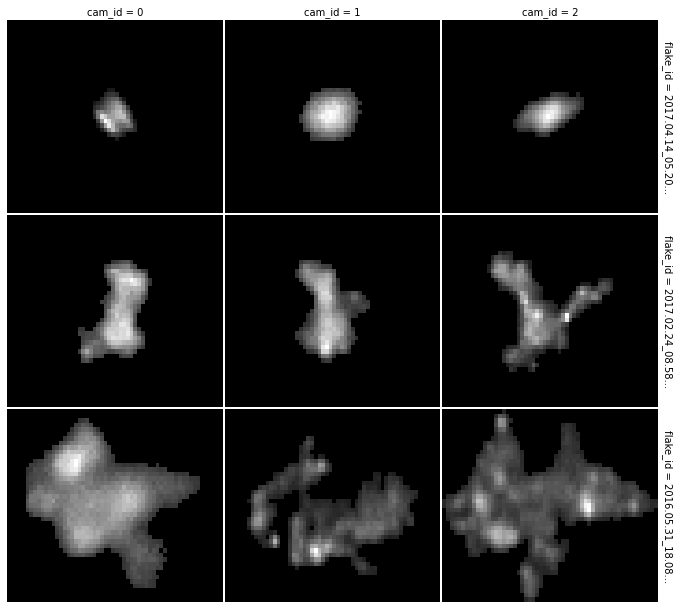

In [10]:
mascdb.plot_triplets(random = True, zoom=True) # by default plot a single triplet 
mascdb.plot_triplets(indices=[0,10], n_triplets = 1, zoom=True) # --> n_triplet has no effect
mascdb.plot_triplets(indices=[0,10], n_triplets = 1, zoom=True, enhancement=None)
mascdb.plot_triplets(random = True, n_triplets = 1, zoom=True) 
mascdb.plot_triplets(random = True, n_triplets = 3, zoom=True)

In [ ]:
triplette = pd.read_parquet('Data/Features/MASCdb_triplet.parquet')
display(triplette.shape)
display(triplette.head(10))

(851697, 94)

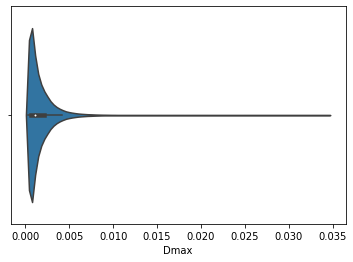

In [9]:
features_0 = pd.read_parquet('Data/MASCDB/MASCdb_cam2.parquet')
features_0.sns.violinplot(x='Dmax')
display(features_0.shape)

In [ ]:
train_0 = pd.read_pickle('Data/hydro_trainingset/hydro_trainingset_cam2.pkl')
display(train_0.shape)
display(features_0[features_0['flake_id'].isin(train_0['flake_id'])])

**Remark:** Par exemple, on peut avoir 1100 flocons qui sont classifiés pour la cam 2, mais seulement 815 sont dans le parquet file. La raison veint du fait que la classification a été faite sur les images et donc les données numériques n'ont pas été nécéssairement produites poru toutes les photos.